<a href="https://colab.research.google.com/github/kumarmanketeng/Machine-Learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

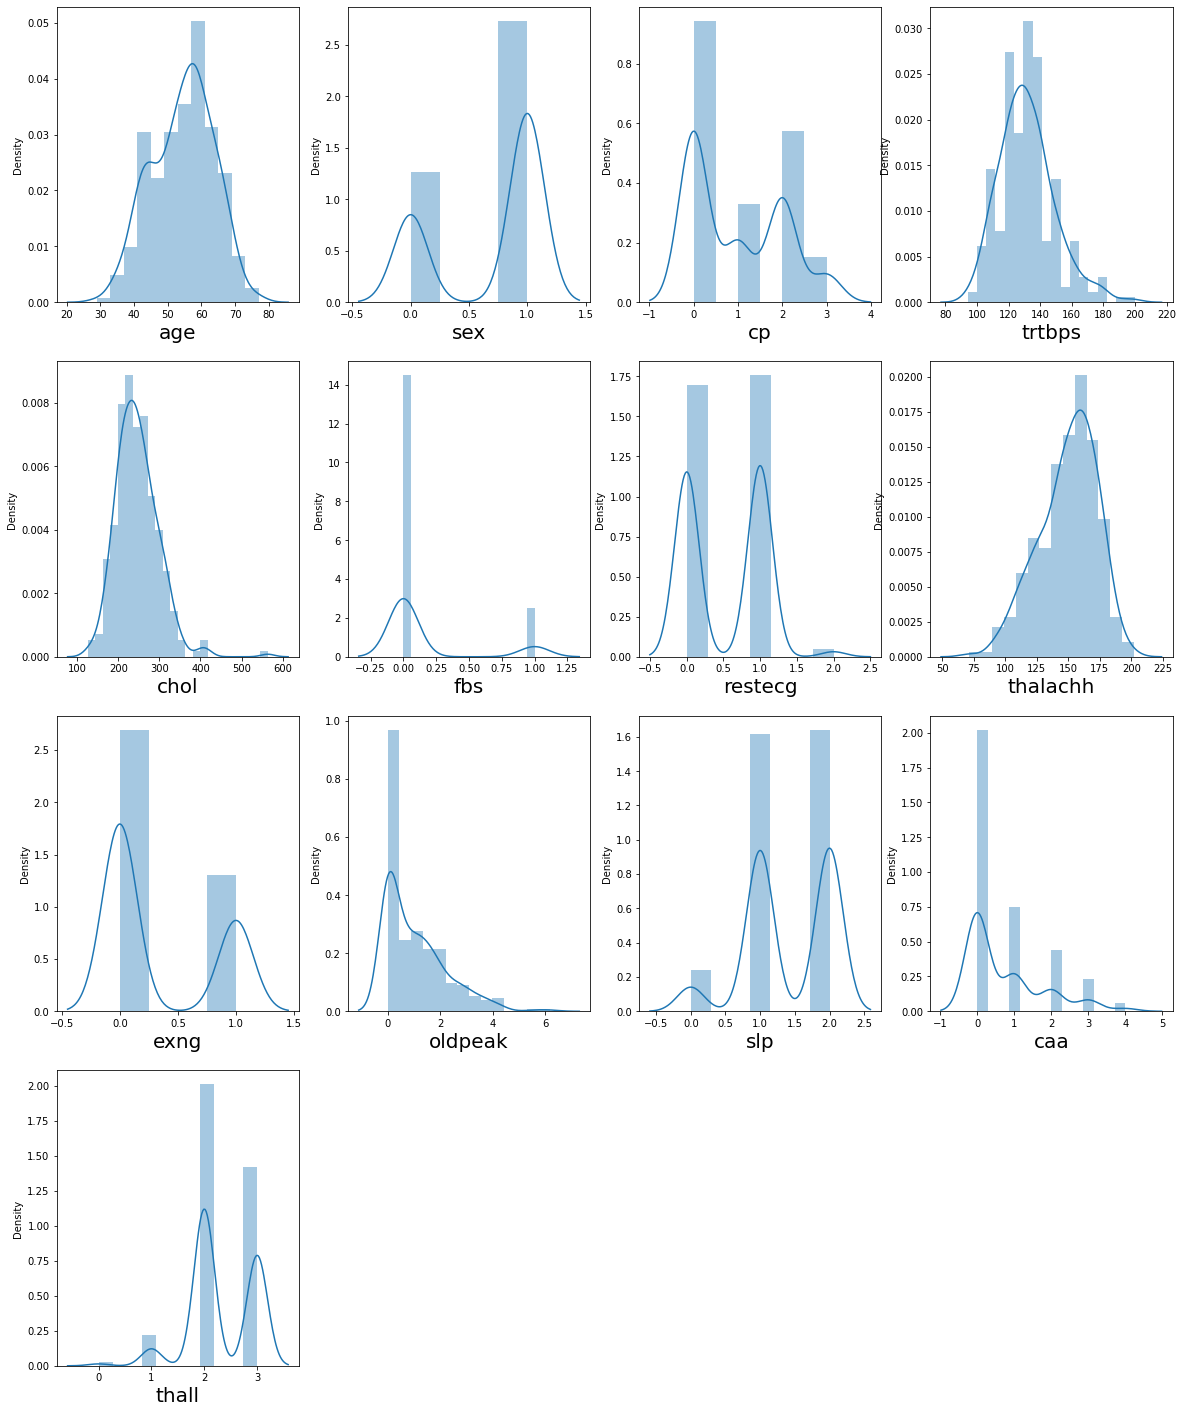

In [6]:
plt.figure(figsize=(20,25))
plot = 1

for c in df:
    if plot<14:
        ax=plt.subplot(4,4,plot)
        sns.distplot(df[c])
        plt.xlabel(c, fontsize=20)
    plot += 1

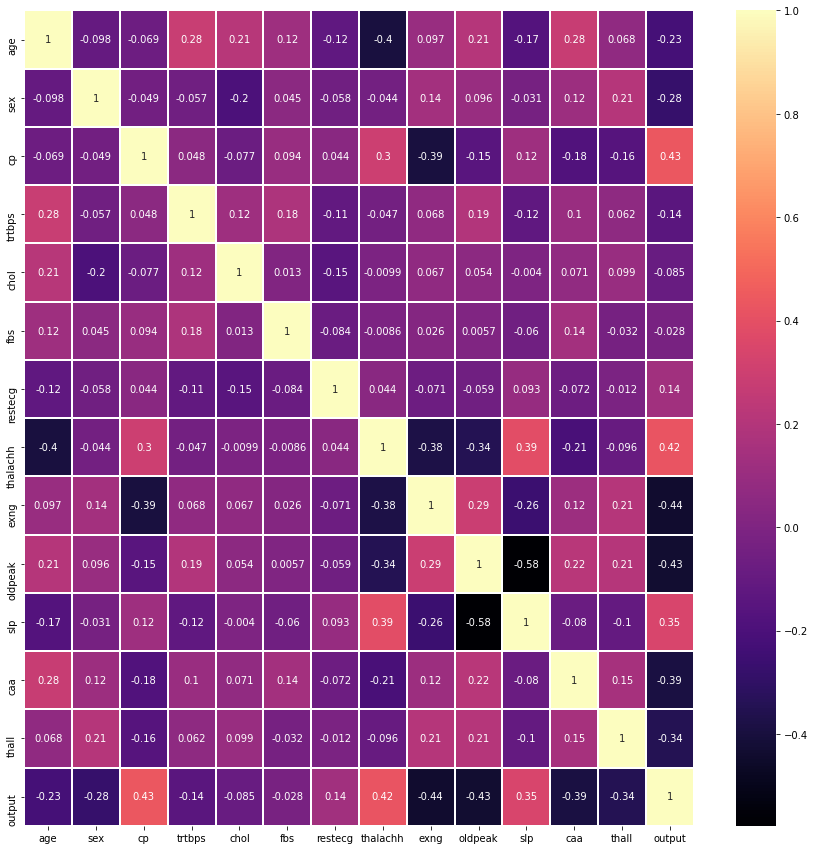

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [8]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

In [11]:
df['trtbps']=np.log(df['trtbps'])
df['chol']=np.log(df['chol'])
df['thalachh']=np.log(df['thalachh'])

In [13]:
df['trtbps'].var()

0.0007102493756860686

In [14]:
df['chol'].var()

0.0013822000072861776

In [15]:
df['thalachh'].var()

0.027143394718192854

In [17]:
X = df.drop('output', axis=1)
y = df['output']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Logistic regression**

In [21]:
accuracies = {}

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Accuracy Score:
0.8901098901098901

Confusion Matrix: 
[[38  6]
 [ 4 43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.88      0.91      0.90        47

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**K NearestNeighbour**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, pred))
accuracies['KNN'] = accuracy_score(y_test, pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report: ")
print(classification_report(y_test, pred))

Accuracy Score:
0.7692307692307693

Confusion Matrix: 
[[35  9]
 [12 35]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        44
           1       0.80      0.74      0.77        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [24]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

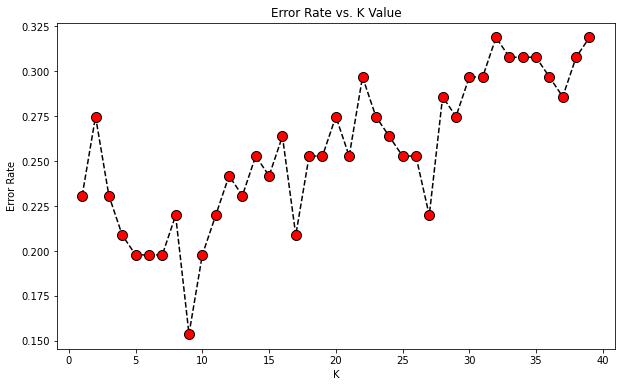

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\t\t\t With K = 9\n')
print("Accuracy Score:")
print(accuracy_score(y_test, pred))
accuracies['KNN with k=9'] = accuracy_score(y_test, pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, pred))

print("\nClassification Report: ")
print(classification_report(y_test, pred))

			 With K = 9

Accuracy Score:
0.8461538461538461

Confusion Matrix: 
[[33 11]
 [ 3 44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



**SVM** 

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, svc_pred))
accuracies['SVM'] = accuracy_score(y_test, svc_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, svc_pred))

print("\nClassification Report: ")
print(classification_report(y_test, svc_pred))

Accuracy Score:
0.8681318681318682

Confusion Matrix: 
[[36  8]
 [ 4 43]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, rf_pred))
accuracies['Random Forest'] = accuracy_score(y_test, rf_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report: ")
print(classification_report(y_test, rf_pred))

Accuracy Score:
0.8351648351648352

Confusion Matrix: 
[[34 10]
 [ 5 42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [29]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth' : [2,3,5,7,None],
    'max_features': [2,3,4,5,6,8,9,10,11,12,13]
}

rf_randcv = RandomizedSearchCV(estimator=rf,
                               param_distributions= parameters,
                               cv=5, 
                               n_iter=50,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=5,
                               return_train_score=True,
                               random_state=42
                              )

rf_randcv.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   29.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [30]:
rf_randcv.best_params_

{'max_depth': 2, 'max_features': 3, 'n_estimators': 200}

In [31]:
rf_randcv.best_score_

0.8396456256921374

**XGB** **Classifier**

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("Accuracy Score:")
print(accuracy_score(y_test, xgb_pred))
accuracies['XGB Classifier'] = accuracy_score(y_test, xgb_pred)*100

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, xgb_pred))

print("\nClassification Report: ")
print(classification_report(y_test, xgb_pred))

Accuracy Score:
0.8131868131868132

Confusion Matrix: 
[[33 11]
 [ 6 41]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



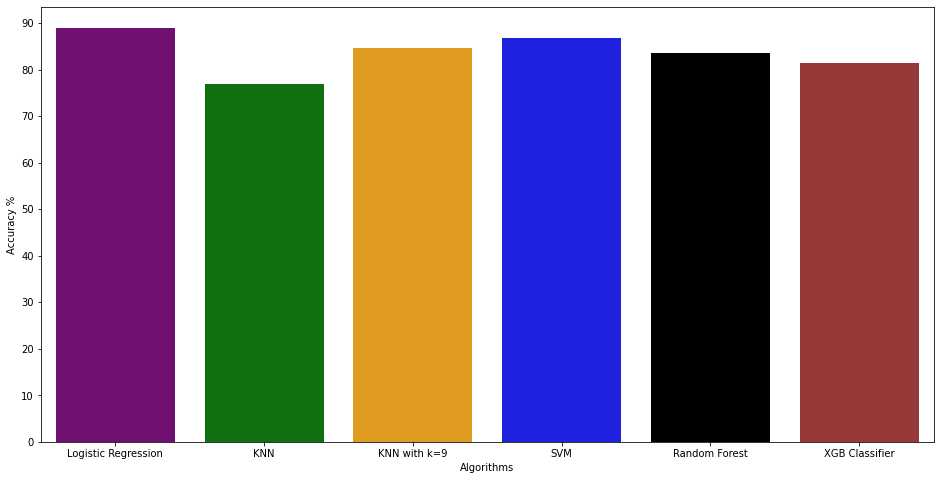

In [33]:
colors = ["purple", "green", "orange","blue","black", "brown"]

plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()